###  Islands: Generalized Linear Models - Chapter 2

[Back to Main Page](0_main_page.ipynb)

<br>

<h1> <center> Linear Regression </center> </h1>  




Imagine you are conducting social research on an island with 10,000 inhabitants. It is well known that the people who live on the island use a set of physical tokens to represent social status. That is, the amount of social status (or lack thereof) that an individual islander has is represented in the number of 'prestige tokens' that that individual has in their posession. The prestige tokens are awarded by those around them, and by the government of the island. 

One of the social scientists in your research team suggests that citizens of the islands who are taller attract a higher number of prestige tokens. The statistical version of this hypothesis is that `prestige` is postiviely associated with `height`. One way of thinking about this statistical hypothesis is that, if you know an islanders' `height`, then this gives you predictive information about their social status. If you know someone is far above average `height`, if the hypothesis is true, then it's a safe bet that have above average `prestige`.

To test this hypothesis, your research team collect `height` and `prestige` scores for 1000 citizens of the island. They do this via random sampling. The government of the island granted the research team access to census data, and so your team were able to use a computer to randomly select 1000 individuals, and survey them to collect the data.

The team contacted the 1000 randomly sampled islanders and recorded how many `prestige` tokens they had in their possession. After a lot of counting, the first 20 rows of the dataframe in which the team stored the `prestige` scores are shown below (each row corresponds to one islander).

`prestige` is a discrete numerical variable, the number of prestige tokens each islander has.

`height` is a continuous numerical variable, recorded in centimeters

In [13]:
# importing some python packages needed for this page
import islands_GLM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# generating the data for this page
height_pop, religion_pop, prestige_pop, df = islands_GLM.prestige_height_df()

# making plots look like R!
islands_GLM.r_ify()

# show the data

df[['height', 'prestige']]

,height,prestige
0,171.63,720
1,158.15,702
2,185.99,758
3,184.40,816
4,151.13,524
...,...,...
995,167.45,682
996,157.81,637
997,160.00,664
998,163.82,632


## Context

Linear regression is (somewhat obviously) the foundational generalized linear model. We have already seen it on the ['What are Generalized Linear Models?'](1_generalized_linear_models.ipynb) page, but now we will delve into how the parameter estimates are obtained, from the conditional distribution approach. 

Linear regression is used to model the linear relationship between a continuous quantitative outcome variable and one or more predictor variables. As with all generalized linear models, the predictor variables can be of any type (quantitative-continuous, quantitative-discrete, nominal-categorical, ordinal-categorical).

The predictions from linear regression can range from positive infinity to negative infinity. So if the outcome variable is does not range from positive to negative infinity, for instance if it must be positive (e.g. number of children), then a different model should be used.

## Model

As shown previously, the prediction equation for the linear regression model is:

$\large \hat{y}_i = b_0 + b_1x_{1i} ... + b_kx_{ki} $

where:

$\hat{y_i} $ : is the predicted value of the outcome variable for a given set of predictor scores, for the $i$th observation

$b_0$ : is the intercept term, the predicted value of the outcome variable when all predictors equal 0

$b_1$ : is the slope of the 1st predictor variable

$x_{1i}$ : is the score on the the first predictor variable, for the $i$th observation

$b_k$ : is the slope of the $k$th predictor variable

$x_{ki}$ : is the score on the $k$th predictor variable, for the $i$th observation


The individual predictions ($\hat{y_i}$), for all $n$ observations, using $k$ variables as predictors are:

$$ \large \hat{y}_1 = b_{0} + b_{1}x1_1 \dots + b_{k}xk_1 $$

$$ \large \hat{y}_2 = b_{0} + b_{1}x1_2 \dots + b_{k}xk_2 $$

$$ \large \hat{y}_3 = b_{0} + b_{1}x1_3 \dots + b_{k}xk_3  $$

$$ \dots $$

$$ \large \hat{y}_n = b_{0} + b_{1}x1_n \dots + b_{k}xk_n  $$

$\hat{y}_1$ is the predicted score on the outcome variable for the 1st observation in the dataset,  $\hat{y}_2$ is the prediction for the second score and so on... 

For each predictor ($xk$), each $b_{k}$ indicates the strength and direction of the relationship between that predictor $xk$ and the outcome variable $y$. If the absolute magnitude of $b_{k}$ is large, then that predictor gives a lot of information about the outcome scores, and is a useful predictor. If $b_{k}$ is small, the predictor does not give much information about the outcome scores.

$b_0$ indicates the predicted score on the outcome variable for an obervation with a score of 0 on all the predictors (where the predictor is categorical, the prediction is for an observation in the baseline category).

In matrix form the linear regression model is:

$$
\Large \begin{bmatrix}
           {\hat{y}_{1}} \\
           \vdots \\
           {\hat{y}_{n}}
         \end{bmatrix} = \begin{bmatrix}
           {1} & {x_{11}} & \dots & {x_{k1}}\\ 
           \vdots & \vdots & \vdots & \vdots\\
           {1} & {x_{1n}} & \dots & {x_{kn}} \\ 
         \end{bmatrix} \begin{bmatrix}
           {b_{0}} \\ 
           \vdots \\
           {b_{k}} \\ 
         \end{bmatrix} 
$$

Or, more compactly:

$ \large \hat{Y} = \beta X$

where $\hat{Y}$ is a vector containing the predicted outcome scores. $\beta$ is a vector containing the parameter estimates (the intercept and slopes) and  $X$ is a matrix containing the predictor scores and a column of 1s (as shown above).


## Parameter Estimation

The model gets its parameters, by maximizing:

$  \huge \prod\limits_{i = 1}^{n} \left(\frac{1}{(2\pi\sigma^{2})^{^{\frac{1}{2}}}}\right)^n e^{\frac{-\sum{(y_{i} - \hat{y_{i}})^{2}}}{2\sigma^{2}}}  $

If you don't recognize that formula it might look formidable. It is in fact the formula for the famous Gaussian (normal) distribution. The mean of the normal distribution is $\hat{y_i}$ and the variance is $\sigma$. 

For a given value of $\hat{y_i}$ and $\sigma$, the formula computes the probability of randomly sampling a particular observation $y_i$ from a normal distribution with that particular mean and variance. The python cell below defines a function which implements the formula: 

In [2]:
def normal_pdf(y, y_hat, sigma):
  
  output = 1/np.sqrt(sigma**2 * 2 * np.pi) * np.e**(-(y - y_hat)**2/(2*sigma**2))
  
  return output

The python cell below applies this function to each element of a vector containing integers ranging from -15 to 15, and plots the results. The y-axis shows the probability of getting each of those scores, if randomly sampling from a normal distribution with a mean of 0 and a standard deviation of 5:

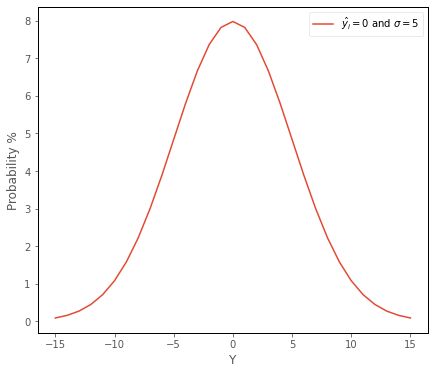

In [3]:
y = np.arange(-15,16)
prob = normal_pdf(y, 0, 5)
plt.plot(y,prob*100, label = r"$\hat{y_i} = 0 $ and $\sigma = 5$") 
plt.xlabel('Y')
plt.ylabel('Probability %')
plt.legend()
plt.show()

We can see that scores around the mean are more probable than scores in the tails of the distribution.

The cell below re-runs the function, and this time also shows the probability of obtaining a score ranging from -15 to 15 if randomly sampling from a normal distribution with  mean of -5 and a variance of 5 (this graph is shown in blue):

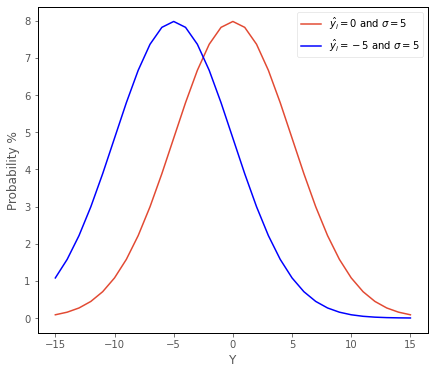

In [4]:
y = np.arange(-15,16)
prob = normal_pdf(y, 0, 5)
plt.plot(y,prob*100, label = r"$\hat{y_i} = 0 $ and $\sigma = 5$") 
prob = normal_pdf(y, -5, 5)
plt.plot(y,prob*100, color = 'blue', label = r"$\hat{y_i} = -5 $ and $\sigma = 5$") 
plt.xlabel('Y')
plt.ylabel('Probability %')
plt.legend()
plt.show()

We can see that as we vary the parameters $\hat{y_i}$ and $\sigma$ the probability of getting a given score changes. Scores closer to -5 are more probable if sampling from a normal distribution with a mean of -5, than if randomly sampling from a normal distribution with a mean of 0.

The graph below shows the effect of applying this functon, with a variety of different $\hat{y_i}$ and $\sigma$ pairings:

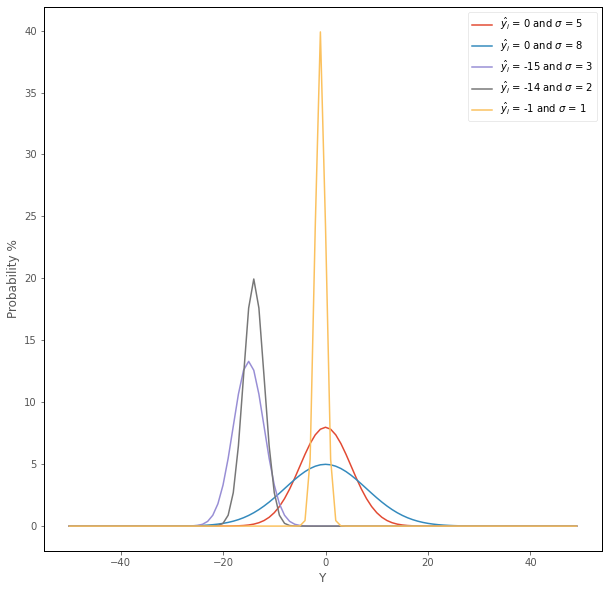

In [5]:
islands_GLM.normal_plot()

Remember from the ['What are Generalized Linear Models?'](1_generalized_linear_models.ipynb) page that linear regression involves fitting a set of conditional normal distributions to the outcome data, as a function of the predictor variables:

![](images/GLM_normal_identity.png)
(Image from: https://blogs.sas.com/content/iml/2015/09/10/plot-distrib-reg-model.html)

The formula above takes the dataset (the predictor scores and outcome scores), and two parameters ($\hat{y_i}$ and $\sigma$) and computes the likelihood of obtaining the outcome scores, conditional on the predictor scores and those particular parameters. The parameter $\hat{y_i}$ is the prediction obtained from the linear prediction equation $b_0 + b_1x_{1i} ... + b_kx_{ki} $. By y finding the values of of $b_0$,  $b_k$ and $\sigma$ which maximize the formula shown above, we find the set of normal distributions which best fit the data, as shown in the image above.

The formula is called the *maximum likelihood* formula, and using it yields the maximum likelihood estimates of the intercept and slopes. As mentioned earlier, for linear regression, these parameter estimates are identical to the estimates obtaining by minimizing the sum of squared error.

Because maximizing the likelihood formula involves multiplying together probabilities, the numbers can get very small very quickly, and this can lead to computational errors. In practice, we get around this by minimizing the *negative log-likelihood*, rather than maximizing the likelihood directly. This produces the same parameter estimates, but is less prone to numerical errors. The negative log-likelihood formula is: 

$ \huge  -\sum\frac{n}{2} \ln(2\pi\sigma^{2}) -\sum \frac{{(y_{i} - \hat{y_{i}})^{2}}}{2\sigma^{2}}$

## Implementation

[with minimize with one predictor model]

## Interpretation (one predictor model)

## Multi-predictor Linear Regression

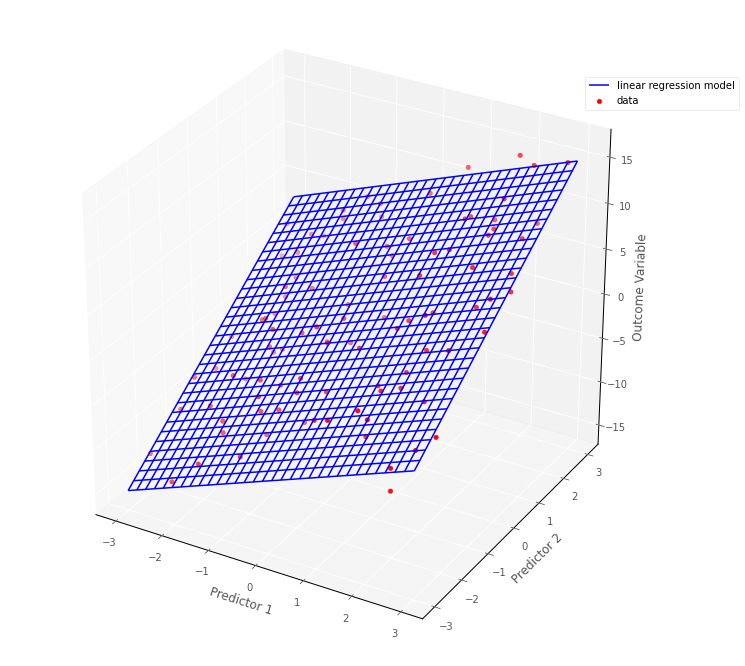

In [6]:
# show how linear regression works in multiple dimensions

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = 2*x + 3*y

data_x = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_y = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_z = 2*data_x + 3*data_y + np.random.normal(0, 3, size = 100)

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(x,y,z, color = 'blue', label = 'linear regression model')
ax1.scatter(data_x, data_y, data_z, color = 'red', label = 'data'  )
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax1.set_zlabel('Outcome Variable')
plt.legend(bbox_to_anchor = (1.1,0.9))
plt.show()

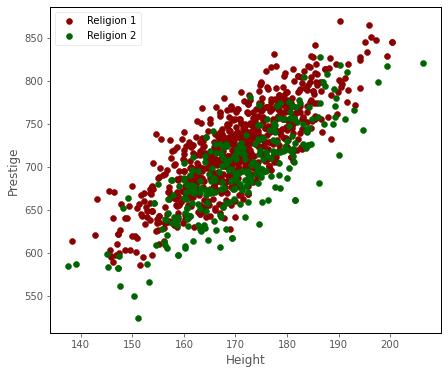

In [7]:
plt.scatter(df[df['religion'] == 1]['height'], df[df['religion'] == 1]['prestige'], label = 'Religion 1', color = 'darkred')
plt.scatter(df[df['religion'] == 0]['height'], df[df['religion'] == 0]['prestige'], label = 'Religion 2', color = 'darkgreen')
plt.xlabel('Height')
plt.ylabel('Prestige')
plt.legend()
plt.show()

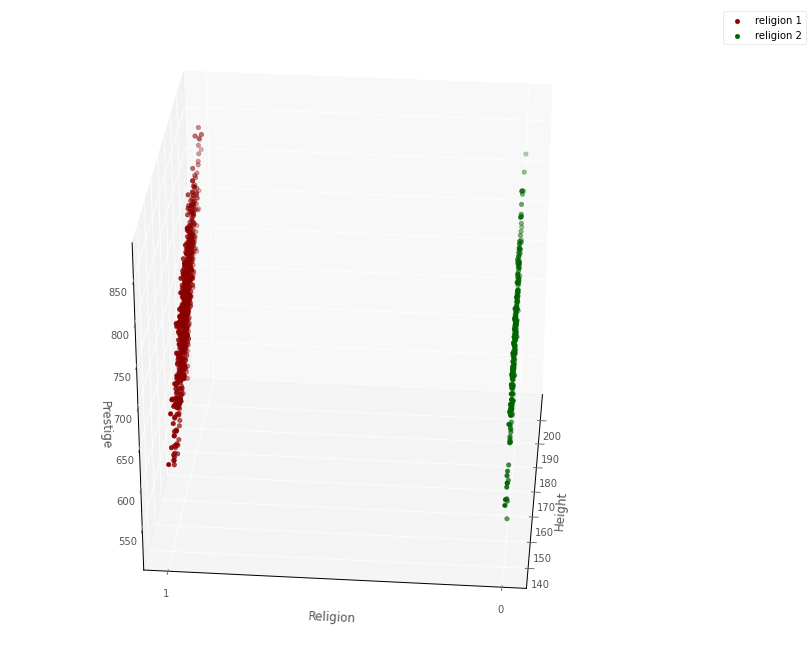

In [8]:
religion_1 = df[df['religion'] == 1]
religion_2 = df[df['religion'] == 0]

fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(religion_1['height'], religion_1['religion'] , religion_1['prestige'], color = 'darkred', label = 'religion 1'  )
ax1.scatter(religion_2['height'], religion_2['religion'] , religion_2['prestige'], color = 'darkgreen', label = 'religion 2'  )
ax1.set_yticks([0,1])
plt.xlabel('Height')
plt.ylabel('Religion')
ax1.set_zlabel('Prestige')
ax1.view_init(azim = 185)
plt.legend(bbox_to_anchor = (1.2,1))
plt.show()

In [9]:
import statsmodels.formula.api as smf

lin_reg_model = smf.ols('prestige ~ religion + height + religion*height', data = df).fit()

lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     728.3
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          1.56e-250
Time:                        13:23:33   Log-Likelihood:                -4814.0
No. Observations:                1000   AIC:                             9636.
Df Residuals:                     996   BIC:                             9656.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.9980     27.826      0.467      0.641     -41.606      67.602
religion           10.5461     33.373      0.316      0.752     -54.943      76.035
height              3.9892      0.163     24.461      0.000       3.669       4.309
religion:height     0.1010      0.196      0.516      0.606      -0.283       0.485
==============================================================================
Omnibus:                        4.232   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.395
Skew:                          -0.004   Prob(JB):                        0.183
Kurtosis:                       2.715   Cond. No.                     9.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

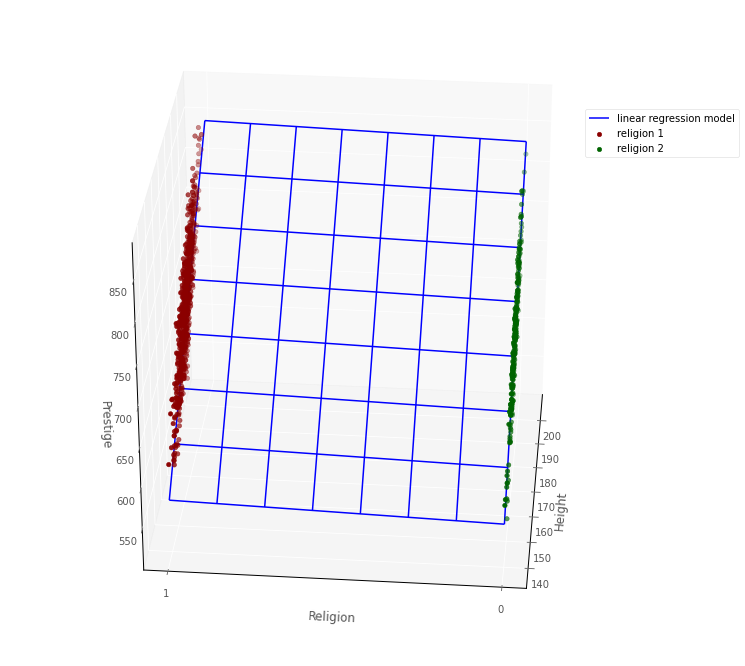

In [10]:
intercept, religion_slope, height_slope = lin_reg_model.params[:3]

height_x = np.linspace(np.min(df['height']), np.max(df['height']), 8)
religion_y = np.linspace(np.min(df['religion']), np.max(df['religion']), 8)
height_x, religion_y = np.meshgrid(height_x, religion_y)
prestige_z = intercept + height_slope * height_x.ravel() + religion_slope * religion_y.ravel()

fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(height_x, religion_y,
                prestige_z.reshape(height_x.shape), label = 'linear regression model', color = 'blue')
ax1.scatter(religion_1['height'], religion_1['religion'] , religion_1['prestige'], color = 'darkred', label = 'religion 1'  )
ax1.scatter(religion_2['height'], religion_2['religion'] , religion_2['prestige'], color = 'darkgreen', label = 'religion 2'  )
ax1.view_init(azim = 185)
ax1.set_yticks([0,1])
plt.xlabel('Height')
plt.ylabel('Religion')
ax1.set_zlabel('Prestige')
ax1.legend(bbox_to_anchor = (1.1,0.85))
plt.show()


In [11]:
# checking if one religious group is taller than the other

lin_reg_model_2 = smf.ols('height ~ religion', data = df).fit()

lin_reg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2597
Date:                Fri, 17 Jun 2022   Prob (F-statistic):              0.610
Time:                        13:23:33   Log-Likelihood:                -3768.1
No. Observations:                1000   AIC:                             7540.
Df Residuals:                     998   BIC:                             7550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.2838      0.617    276.034      0.000     169.073     171.494
religion      -0.3729      0.732     -0.510      0.610      -1.809       1.063
==============================================================================
Omnibus:                        0.405   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.290
Skew:                           0.008   Prob(JB):                        0.865
Kurtosis:                       3.082   Cond. No.                         3.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation (multiple predictors)

The coefficient of each predictor tells us the predicted difference in the outcome variable scores for two observations which differed *only* by a one unit score in that predictor. E.g. which had the same score on all other predictors.

The intercept tells us the predicted score on the outcome variable for an observation whose score on all other predictors was 0. 

## Other Chapters

1. [What are Generalized Linear Models?](1_generalized_linear_models.ipynb)
2. [Linear Regression](2_linear_regression.ipynb)
3. [Poisson Regression](3_poisson_regression.ipynb)
4. [Binary Logistic Regression](4_binary_logistic_regression.ipynb)
5. [Multinomial Logistic Regression](5_multinomial_logistic_regression.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 